In [279]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz as sv
import scipy.stats as stats

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [280]:
#Reading the file
#data =  pd.read_csv('project\XYZCorp_LendingData.txt',sep = '\t',na_values = 'NaN',low_memory = False)
data_lending_club=pd.read_csv('loan.csv',na_values = 'NaN')    

C:\Users\44775\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [281]:
#Creating a copy of the file and naming it as df.
df=data_lending_club.copy()
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# DATA UNDERSTANDING

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [283]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [284]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [285]:
df.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [290]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [289]:
for col in df.columns.values:
    missing_values = df[col].isnull().sum()
    if missing_values >=len(df[col])*0.6:
        df = df.drop(col, axis = 1)
        print("droping column: {}".format(col))
    else:
        pass



droping column: mths_since_last_delinq
droping column: mths_since_last_record
droping column: next_pymnt_d
droping column: mths_since_last_major_derog
droping column: annual_inc_joint
droping column: dti_joint
droping column: verification_status_joint
droping column: tot_coll_amt
droping column: tot_cur_bal
droping column: open_acc_6m
droping column: open_il_6m
droping column: open_il_12m
droping column: open_il_24m
droping column: mths_since_rcnt_il
droping column: total_bal_il
droping column: il_util
droping column: open_rv_12m
droping column: open_rv_24m
droping column: max_bal_bc
droping column: all_util
droping column: total_rev_hi_lim
droping column: inq_fi
droping column: total_cu_tl
droping column: inq_last_12m
droping column: acc_open_past_24mths
droping column: avg_cur_bal
droping column: bc_open_to_buy
droping column: bc_util
droping column: mo_sin_old_il_acct
droping column: mo_sin_old_rev_tl_op
droping column: mo_sin_rcnt_rev_tl_op
droping column: mo_sin_rcnt_tl
droping co

# DATA CLEANING AND MANIPULATION

In [291]:
#Drop unique identifiers and variables with data points having same value from data set.
df = df.drop(["id","member_id",'url','policy_code','application_type','acc_now_delinq','delinq_amnt' ], axis=1)

In [292]:
#Drop Customer behaviour variables as this variables are not available during the application process.
df.drop(['pymnt_plan','delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens','desc','title','zip_code'],axis=1,inplace=True)

In [293]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti'],
      dtype='object')

In [294]:
#let's dig deep into the target variable: loan_status
df.loan_status.value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [295]:
df=df.drop(df[df['loan_status'] == 'Current'].index)

In [296]:
df['loan_status'].replace('Fully Paid', '0',inplace=True)
df['loan_status'].replace('Charged Off', '1',inplace=True)

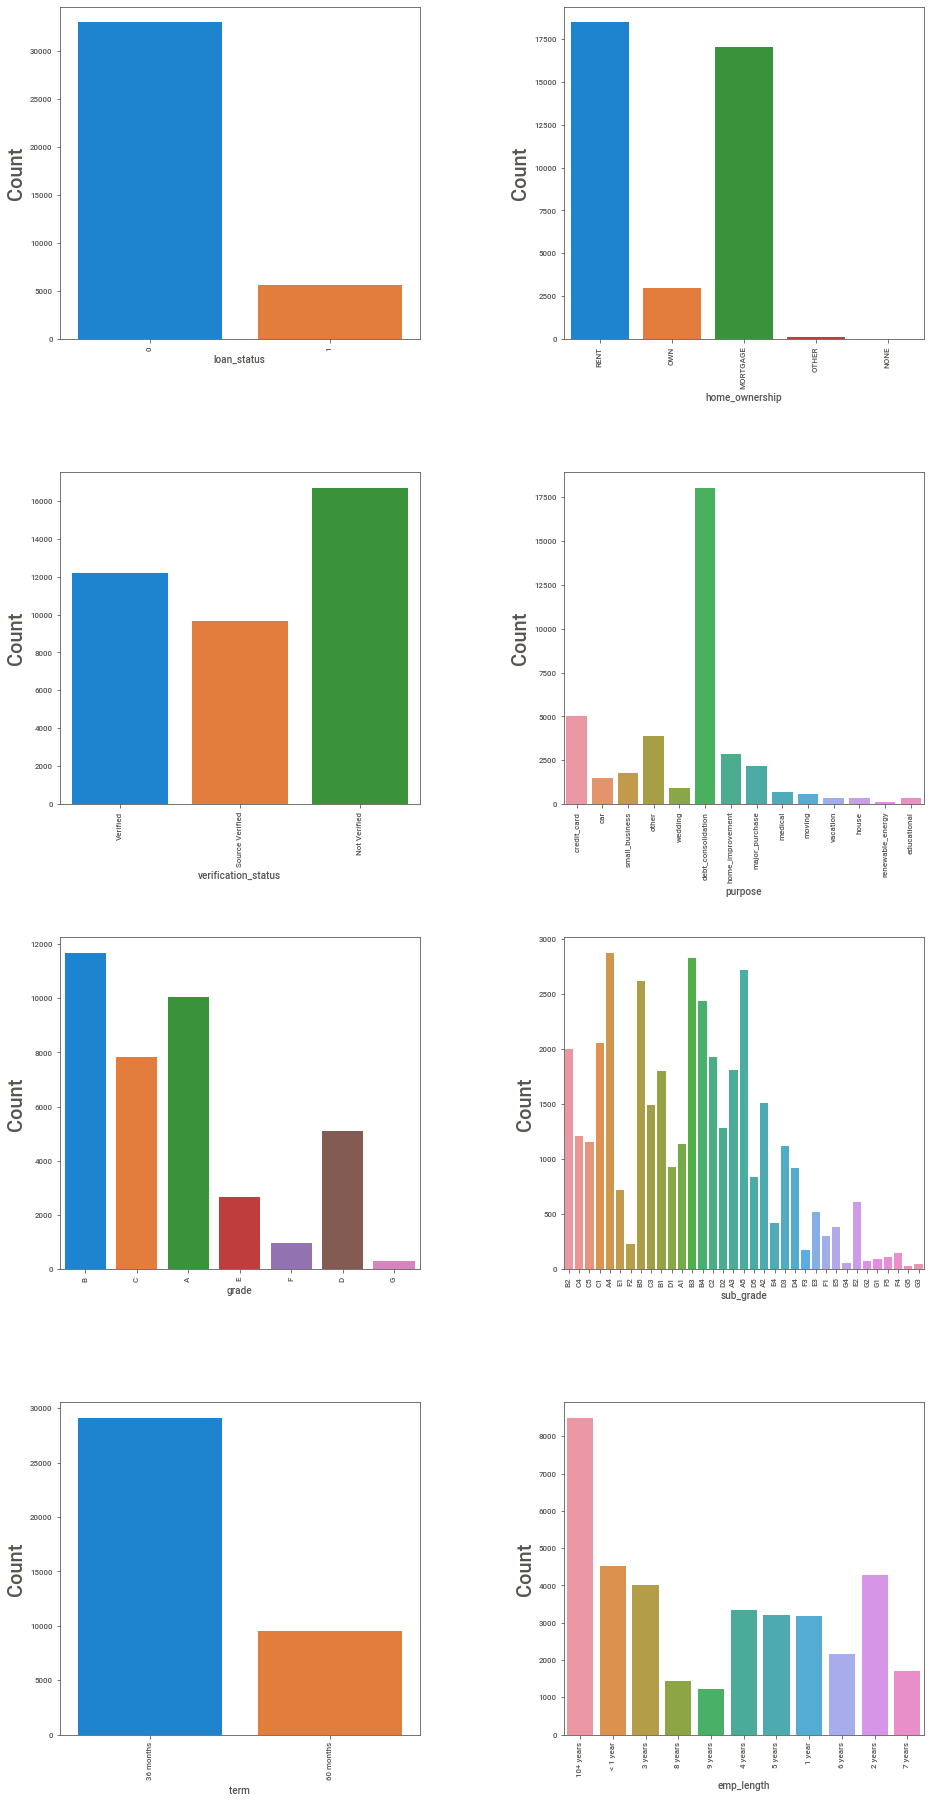

In [297]:
feature = ['loan_status','home_ownership','verification_status','purpose','grade','sub_grade','term','emp_length' ]

plt.figure(figsize = (15, 30))

for i in enumerate(feature):
    plt.subplot(4, 2,i[0]+1)
    g=sns.countplot(x=i[1], data = df)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g.set_ylabel("Count", fontsize=20)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

    plt.xticks(rotation = 90)
    

C:\Users\44775\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


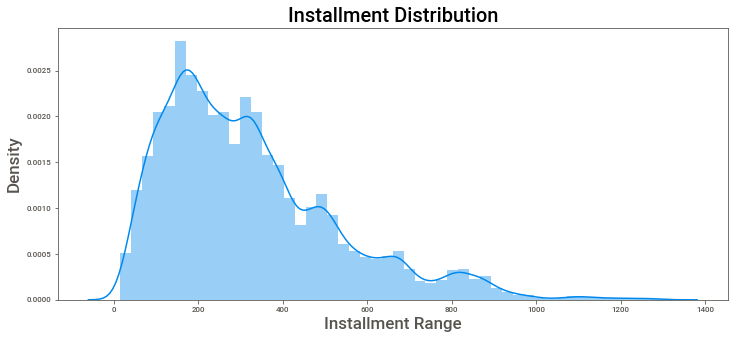

In [298]:
plt.figure(figsize=(12,5))

sns.distplot(df['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

# Visualizing the outliers with box plot


In [309]:
df_num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc'],
      dtype='object')

In [311]:
feature_outliers=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc']


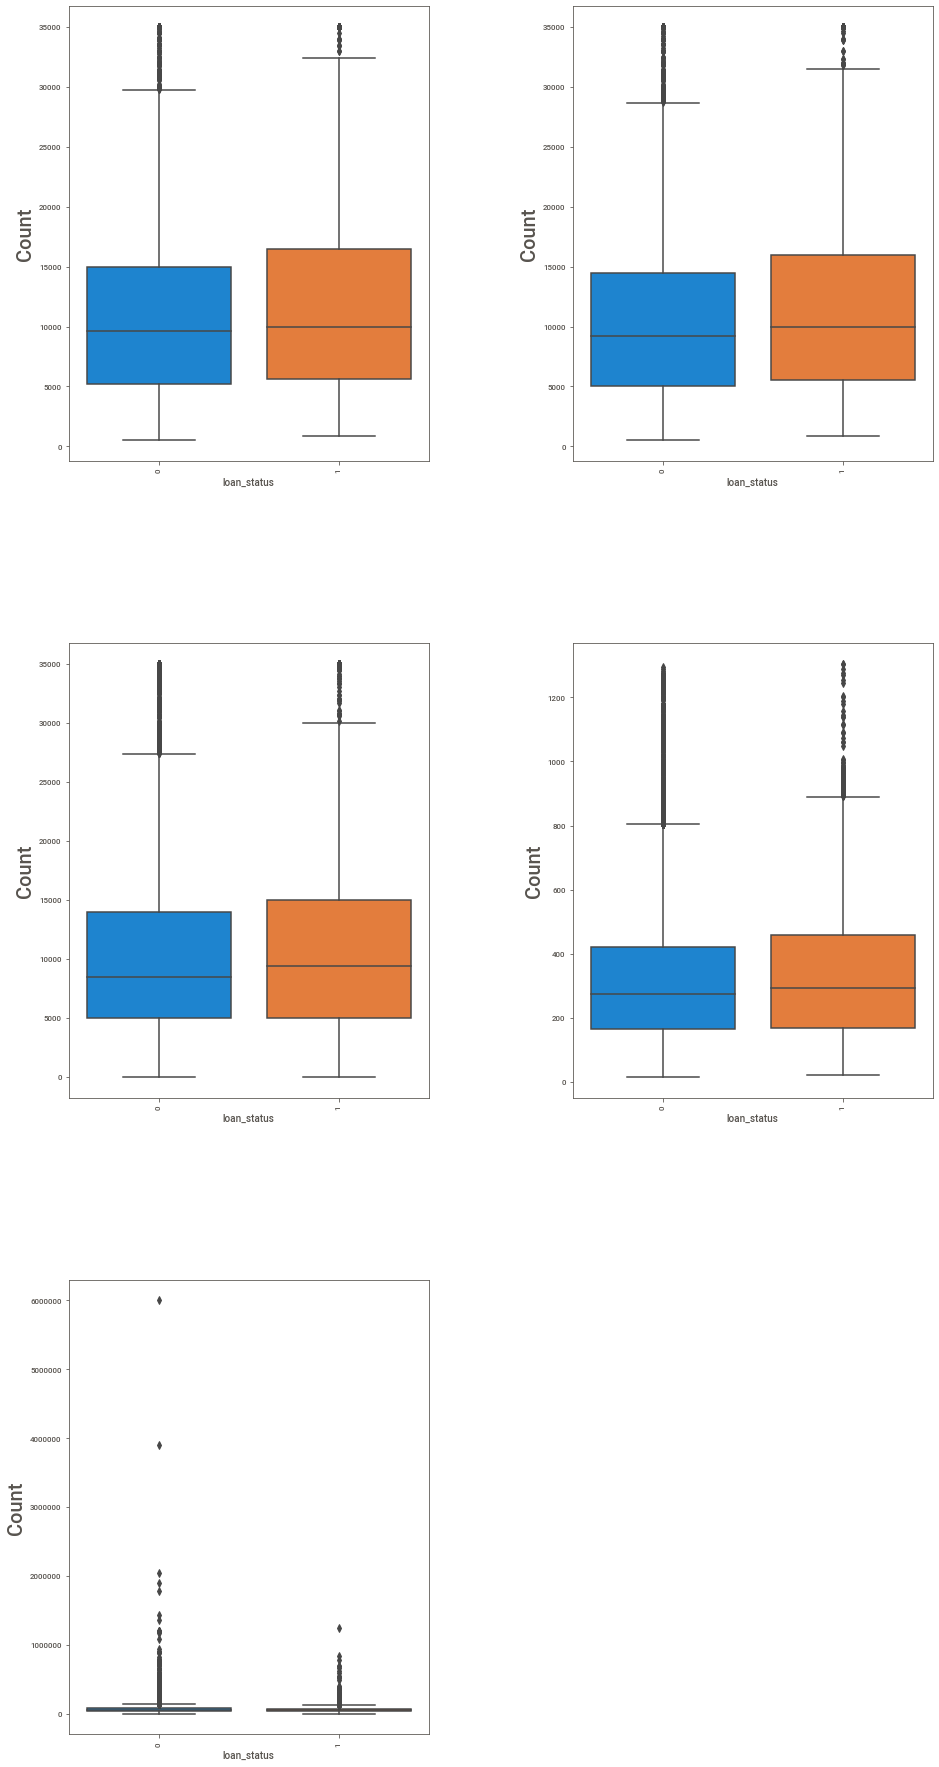

In [312]:
plt.figure(figsize = (15, 30))

for i in enumerate(feature_outliers):
    plt.subplot(3, 2,i[0]+1)
    g=sns.boxplot(x=df['loan_status'],y=i[1], data = df)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g.set_ylabel("Count", fontsize=20)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

    plt.xticks(rotation = 90)

In [324]:
#def cat_num_separate():
 # save all categorical columns in list
categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object']

# dataframe with categorical features
df_cat = df[categorical_columns]
# dataframe with numerical features
df_num = df.drop(categorical_columns, axis=1)

#cat_num_separate()

In [325]:
# Drop columns with missing value over/equal to 80000.
#if missing value less than 60 percent of total length of the variable, then missing value will be replace with median value.

for col in df_num.columns.values:
    missing_values = df_num[col].isnull().sum()
    if missing_values >=len(df_num[col])*0.6:
        print("droping column: {}".format(col))
        df_num = df_num.drop(col, axis = 1)
    else:
        df_num = df_num.fillna(df_num[col].median())

In [326]:
#calculate the skewness of the continous variables
from scipy.stats import skew
df_num_skew = df_num.apply(lambda x: skew(x.dropna()))
df_num_skew

loan_amnt           1.078061
funded_amnt         1.103786
funded_amnt_inv     1.129953
installment         1.150442
annual_inc         31.197201
dti                -0.026841
dtype: float64

In [327]:
df_num[df_num_skew.index].head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti
0,5000,5000,4975.0,162.87,24000.0,27.65
1,2500,2500,2500.0,59.83,30000.0,1.00
2,2400,2400,2400.0,84.33,12252.0,8.72
3,10000,10000,10000.0,339.31,49200.0,20.00
5,5000,5000,5000.0,156.46,36000.0,11.20


In [328]:
#apply log + 1 transformation for all numeric features with skewnes over .75
df_num_skew = df_num_skew[df_num_skew > .75]
df_num[df_num_skew.index] = np.log1p(df_num[df_num_skew.index])

In [329]:
df_num1=df_num[df_num_skew.index] 
df_num1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc
0,8.517393,8.517393,8.512382,5.099073,10.085851
1,7.824446,7.824446,7.824446,4.108083,10.308986
2,7.783641,7.783641,7.783641,4.446526,9.413526
3,9.210440,9.210440,9.210440,5.829857,10.803669
5,8.517393,8.517393,8.517393,5.059171,10.491302


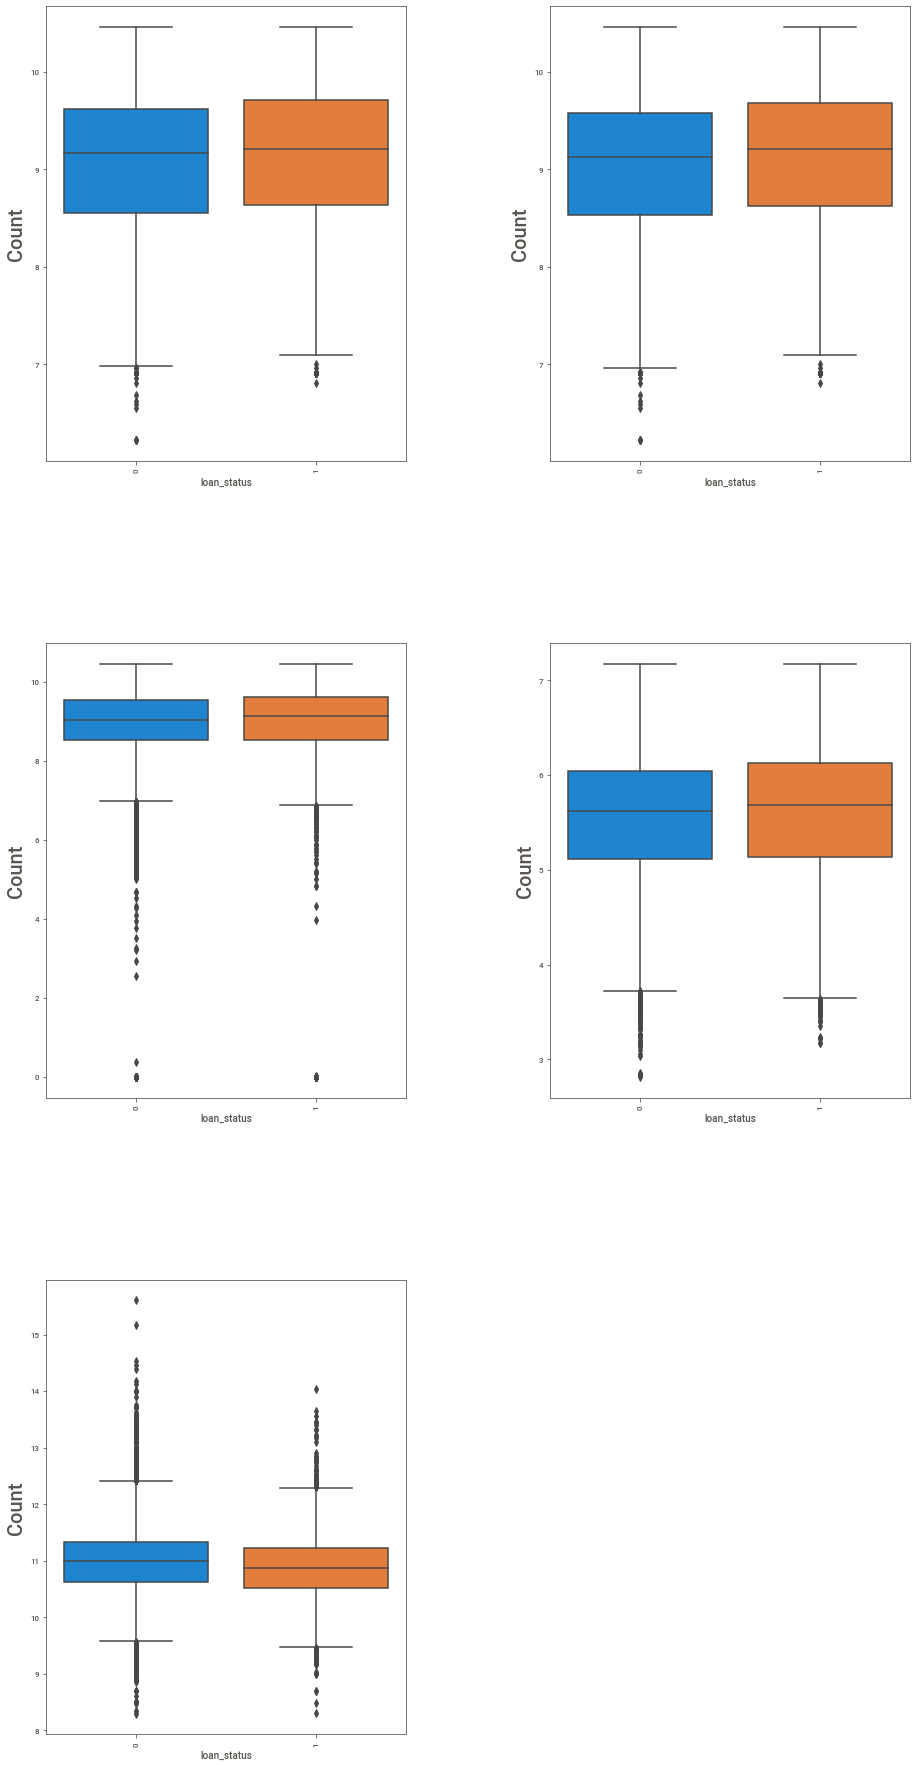

In [331]:
plt.figure(figsize = (15, 30))

for i in enumerate(feature_outliers):
    plt.subplot(3, 2,i[0]+1)
    g=sns.boxplot(x=df['loan_status'],y=i[1], data = df_num1)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g.set_ylabel("Count", fontsize=20)
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

    plt.xticks(rotation = 90)

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>],
       [<AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>, <AxesSubplot:>]],
      dtype=object)

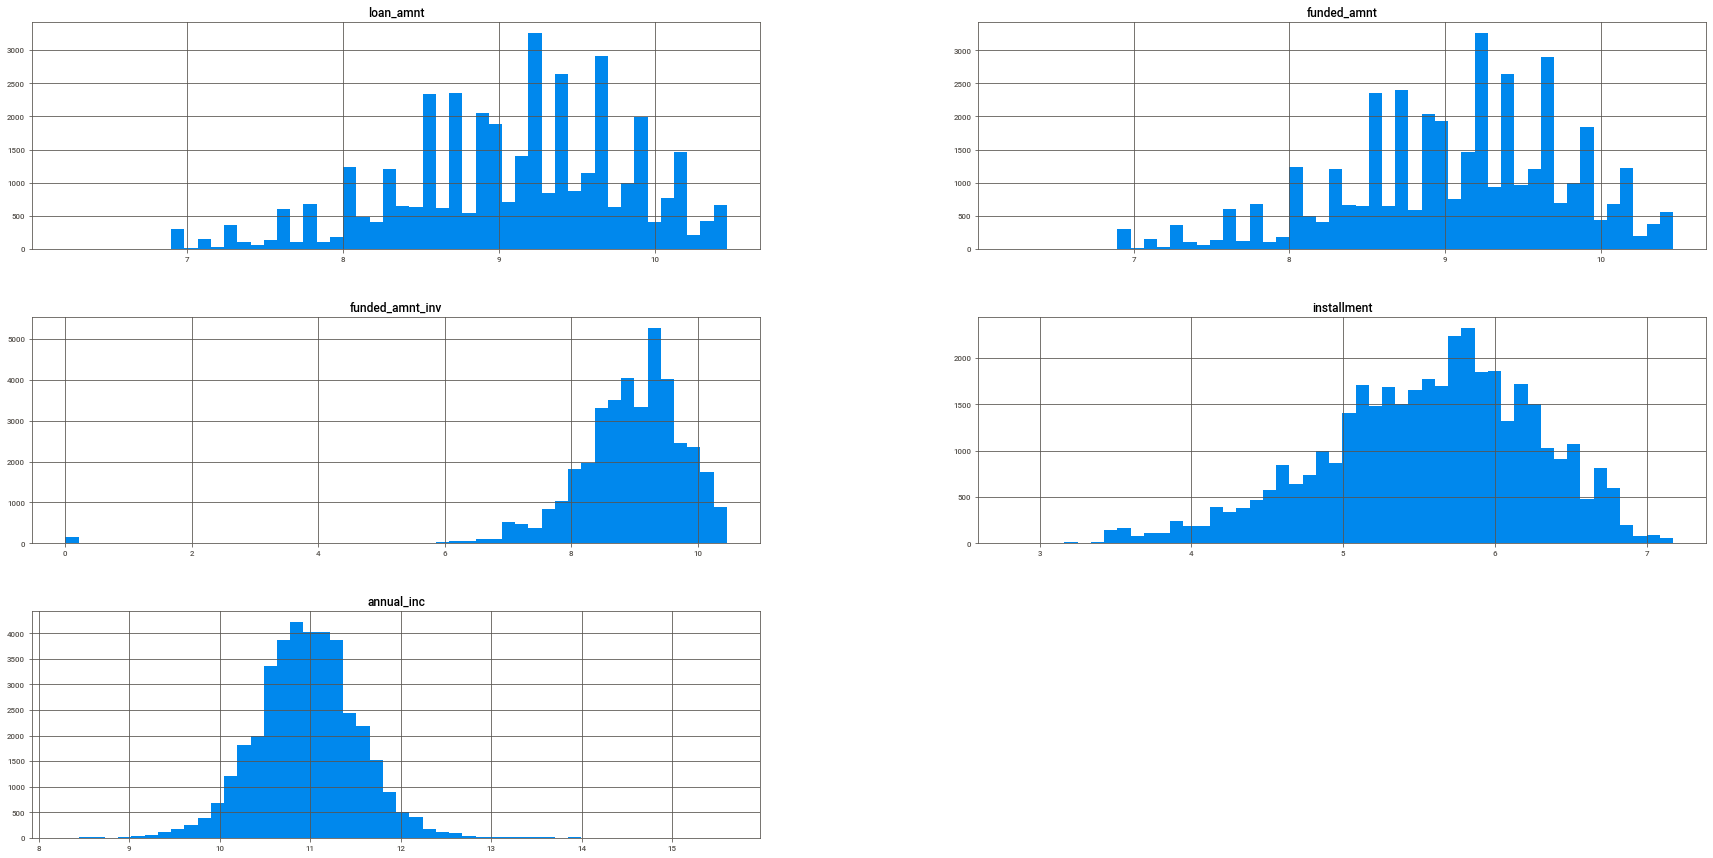

In [321]:
#Continous feature after setting the skew =<0.75
df_num.hist(figsize=(30, 15), bins=50, xlabelsize=8, ylabelsize=8)

# DATA ANALYSIS

Text(0.5, 1.0, 'Correlation between features')

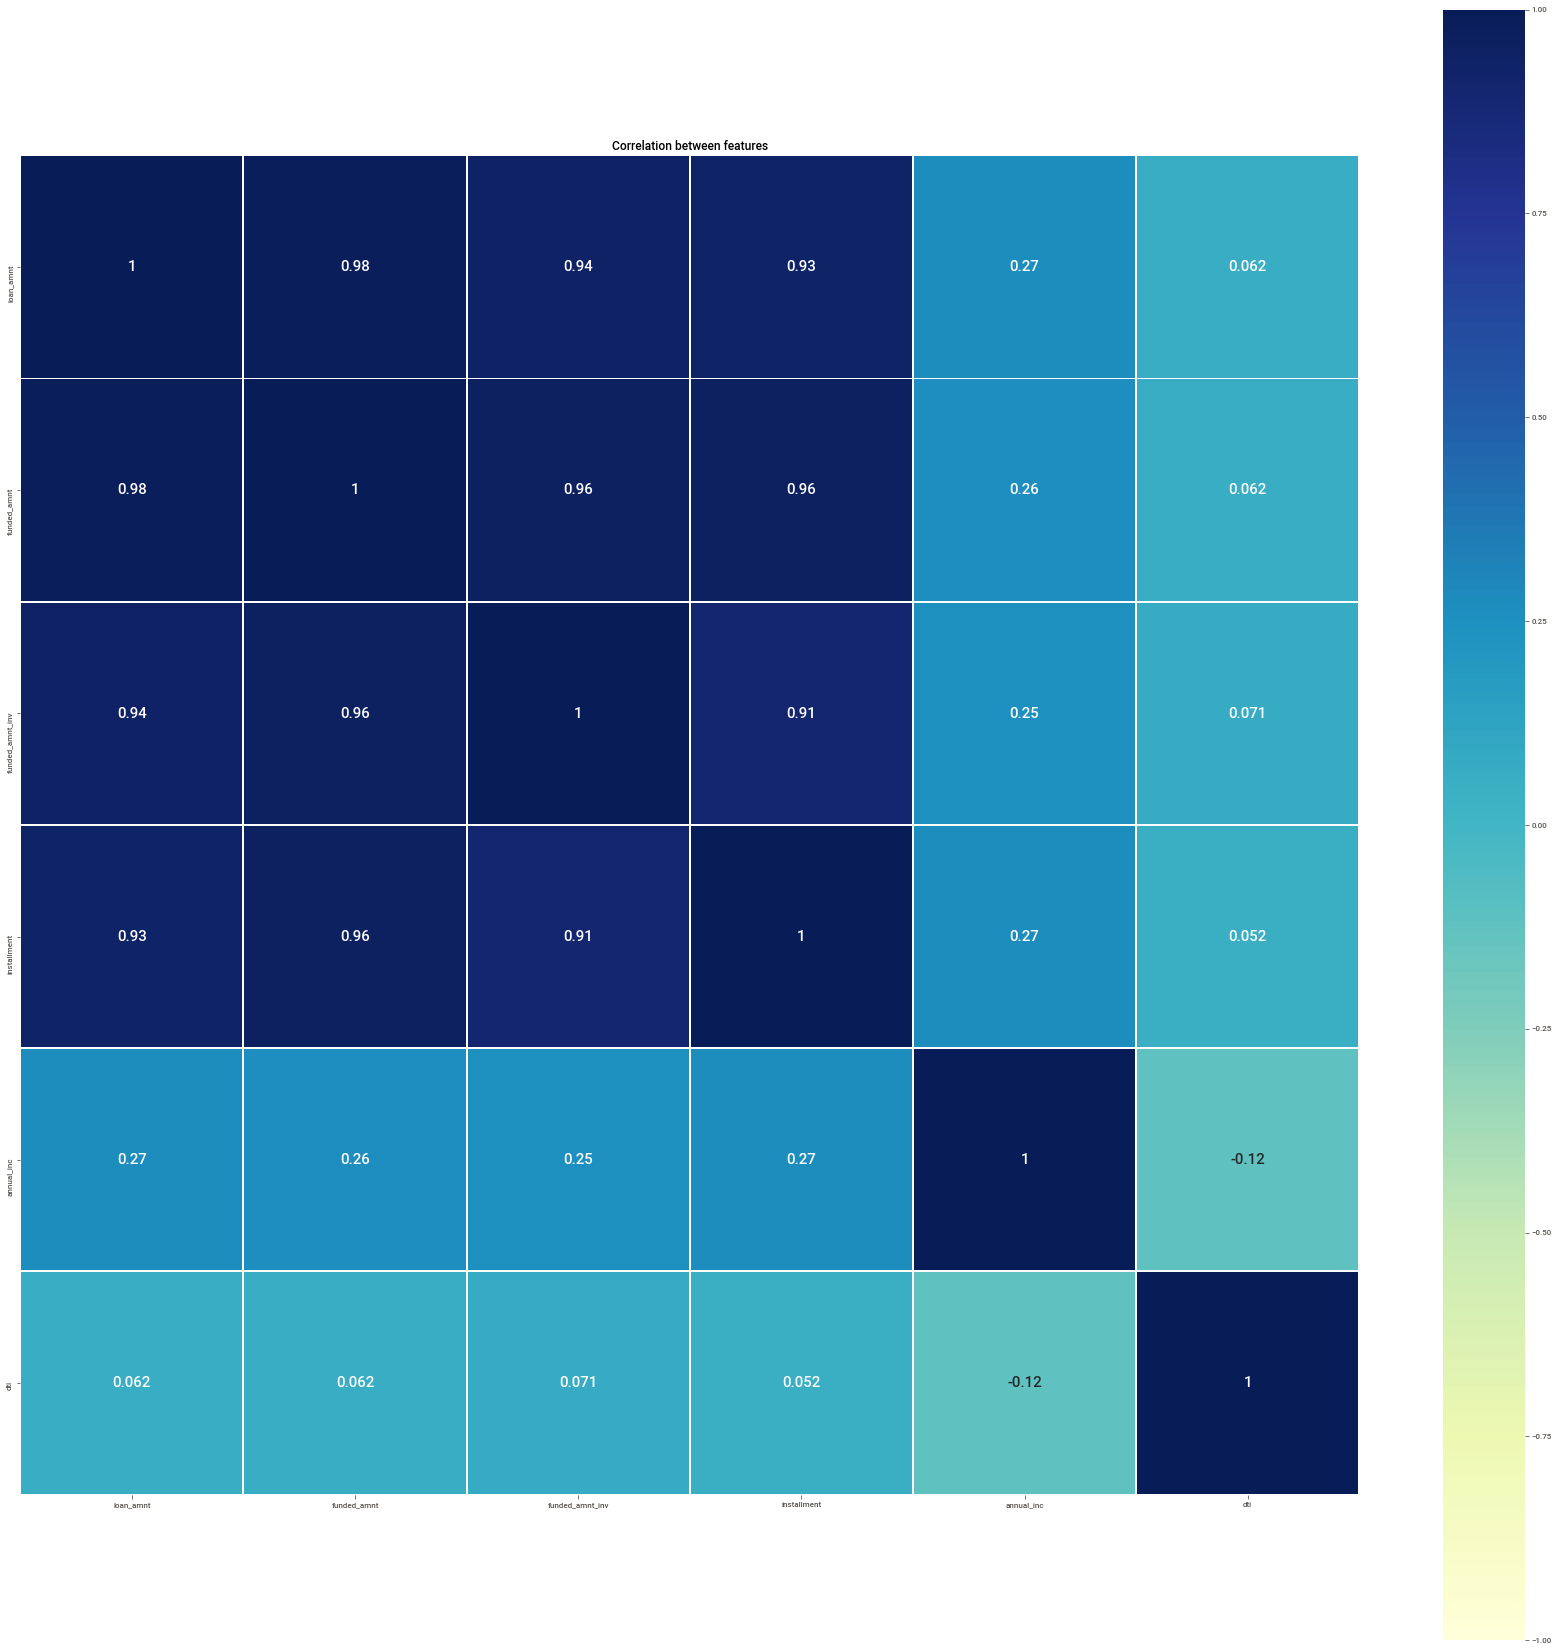

In [246]:
# Ploting correlation plot for continous variable with correlation between 0.5 and -0.5

corr=df_num.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0) | (corr <= 0)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=1,
            annot=True, annot_kws={"size": 15}, square=True);
plt.title('Correlation between features')

In [247]:
df=pd.concat([df_num,df_cat],axis=1)

In [248]:
sweet_report = sv.analyze(df)
sweet_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [250]:
df = df.drop([ 'funded_amnt', 'funded_amnt_inv', 'installment',
       'int_rate', 'emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'addr_state','sub_grade'], axis=1)

In [251]:
df.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'term', 'grade', 'loan_status'], dtype='object')

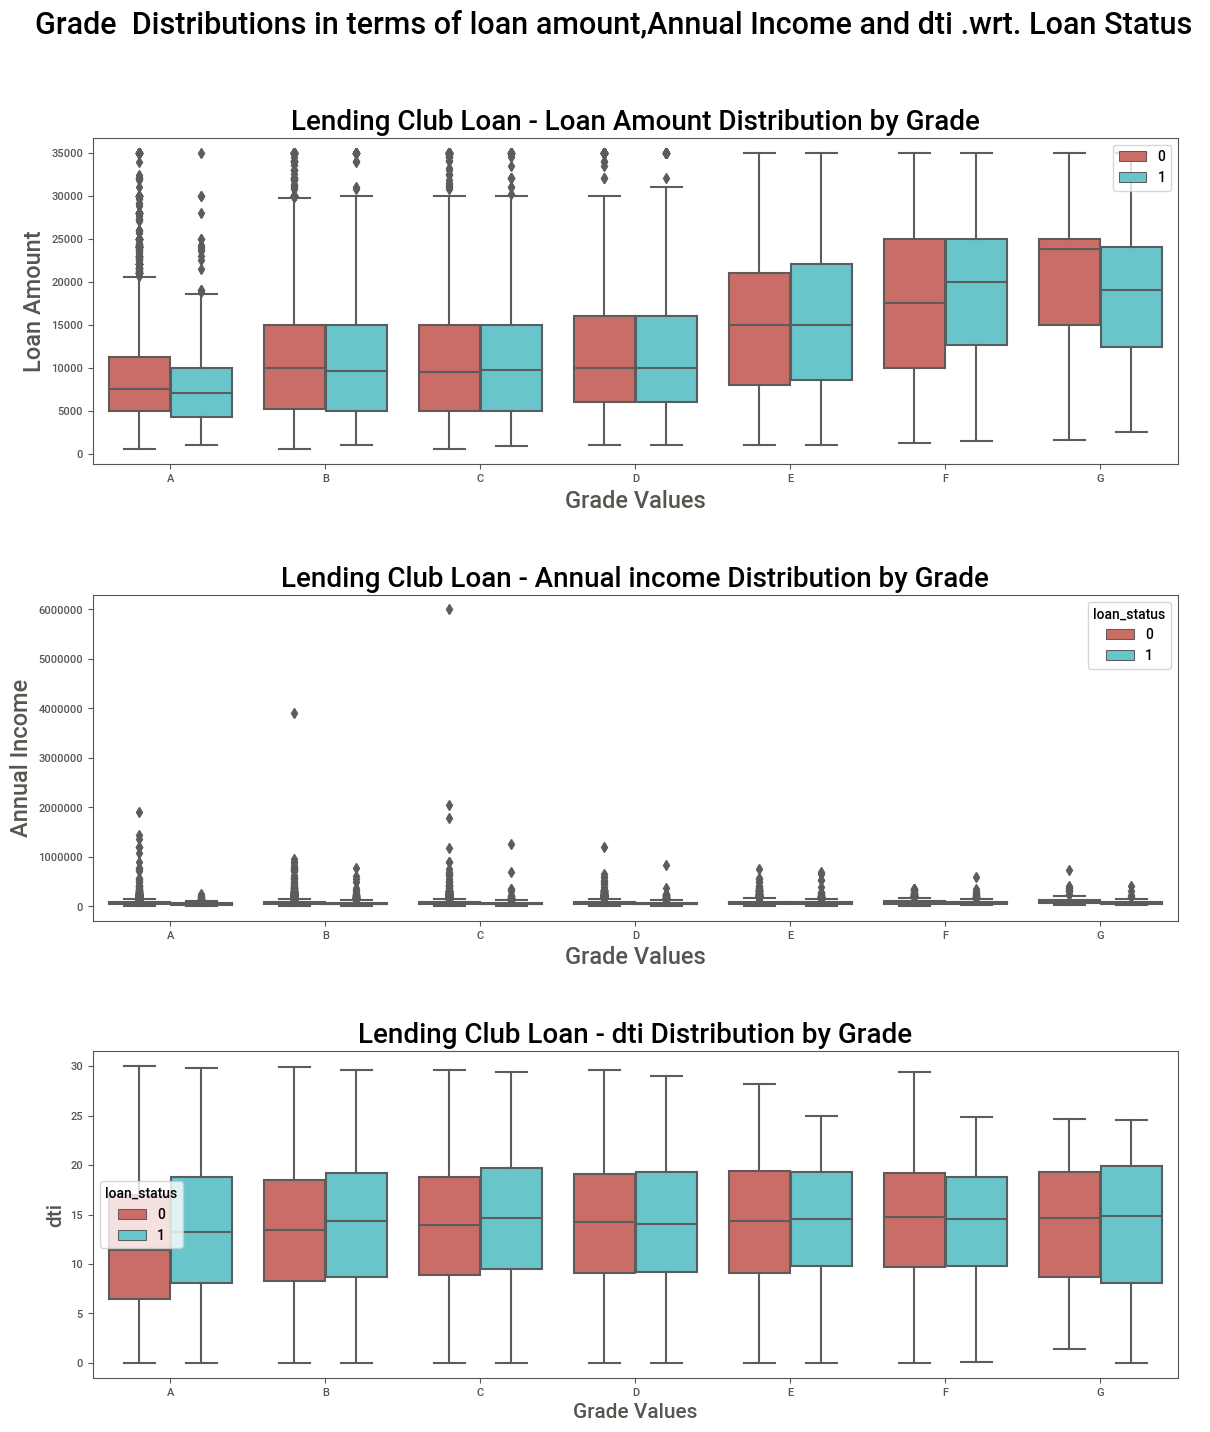

In [219]:

plt.figure(figsize=(14,16))

plt.suptitle('Grade  Distributions in terms of loan amount,Annual Income and dti .wrt. Loan Status ', fontsize=22)

plt.subplot(311)
g = sns.boxplot(x="grade", y="loan_amnt", data=df,
                palette="hls", hue="loan_status", 
                order=["A",'B','C','D','E','F', 'G'])
g.set_xlabel("Grade Values", fontsize=17)
g.set_ylabel("Loan Amount", fontsize=17)
g.set_title("Lending Club Loan - Loan Amount Distribution by Grade", fontsize=20)
g.legend(loc='upper right')

plt.subplot(312)
g1 = sns.boxplot(x='grade', y="annual_inc",data=df, 
               hue="loan_status", palette = "hls",  
               order=["A",'B','C','D','E','F', 'G'])
g1.set_xlabel("Grade Values", fontsize=17)
g1.set_ylabel("Annual Income", fontsize=17)
g1.set_title("Lending Club Loan - Annual income Distribution by Grade", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x="grade", y="dti", data=df,hue="loan_status", 
                   palette="hls", order= ["A",'B','C','D','E','F', 'G'])
g2.set_xlabel("Grade Values", fontsize=15)
g2.set_ylabel("dti", fontsize=15)
g2.set_title("Lending Club Loan - dti Distribution by Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

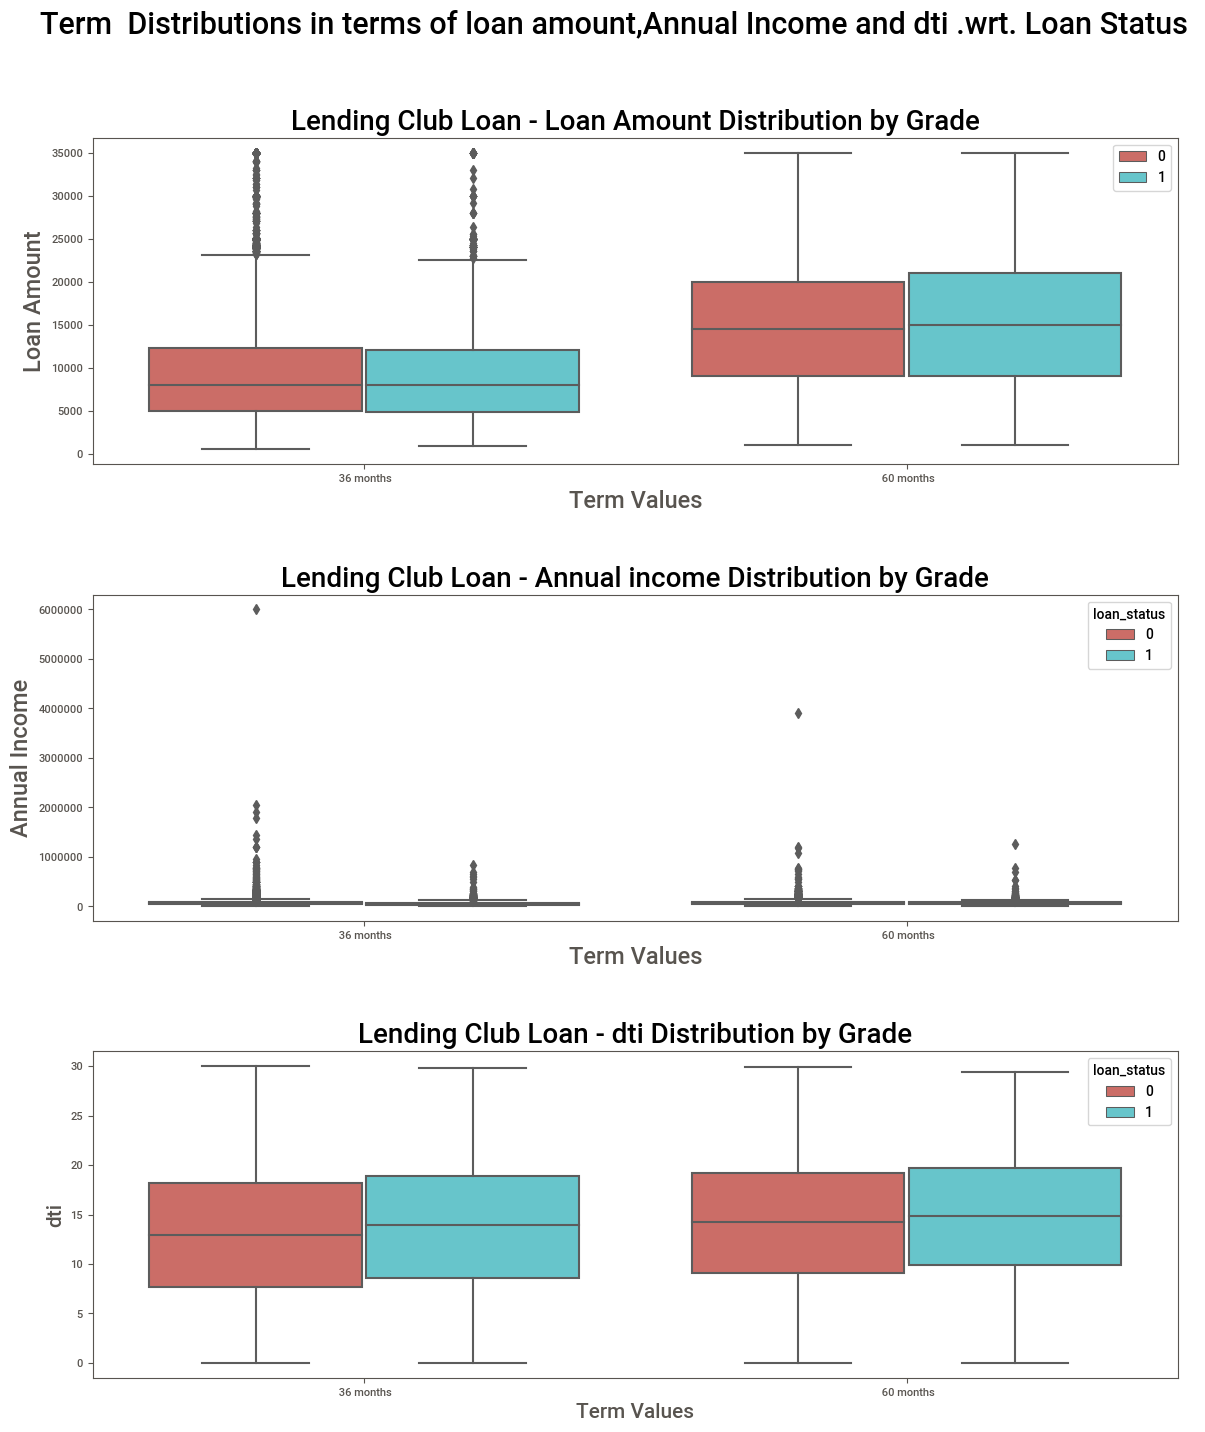

In [253]:
plt.figure(figsize=(14,16))

plt.suptitle('Term  Distributions in terms of loan amount,Annual Income and dti .wrt. Loan Status ', fontsize=22)

plt.subplot(311)
g = sns.boxplot(x="term", y="loan_amnt", data=df,
                palette="hls", hue="loan_status")
g.set_xlabel("Term Values", fontsize=17)
g.set_ylabel("Loan Amount", fontsize=17)
g.set_title("Lending Club Loan - Loan Amount Distribution by Grade", fontsize=20)
g.legend(loc='upper right')

plt.subplot(312)
g1 = sns.boxplot(x='term', y="annual_inc",data=df, 
               hue="loan_status", palette = "hls")
g1.set_xlabel("Term Values", fontsize=17)
g1.set_ylabel("Annual Income", fontsize=17)
g1.set_title("Lending Club Loan - Annual income Distribution by Grade", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x="term", y="dti", data=df,hue="loan_status", 
                   palette="hls")
g2.set_xlabel("Term Values", fontsize=15)
g2.set_ylabel("dti", fontsize=15)
g2.set_title("Lending Club Loan - dti Distribution by Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()